<a href="https://colab.research.google.com/github/Napawan2005/NLP-517432/blob/Test/NLP_EDA_hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

660710086 นภัสวรรณ กอสินประเสริฐ

# EDA

***เนื้อหาเกี่ยวกับ Dataset***

&nbsp;&nbsp; ข้อมูลนี้เกี่ยวกับการริวิวของโรงแรมทั้งที่**เป็นความจริง หรือ ไม่เป็นความจริง** ***(Deceptive)***
ประกอบด้วย **20 โรงแรม** ในเมืองชิคาโก้ ซึ่งในริวิประกอบไปด้วย**ริวิวทางบวก และ ทางลบ**

**Dataset**<br>
&nbsp;&nbsp; ประกอบไปด้วย

- รีวิวเชิงบวกที่เป็นความจริง (Truthful positive reviews) จำนวน 400 รายการ จาก TripAdvisor

- รีวิวเชิงบวกที่เป็นเท็จ (Deceptive positive reviews) จำนวน 400 รายการ จาก Mechanical Turk

- รีวิวเชิงลบที่เป็นความจริง (Truthful negative reviews) จำนวน 400 รายการ จาก Expedia, Hotels.com, Orbitz, Priceline, TripAdvisor และ Yelp

- รีวิวเชิงลบที่เป็นเท็จ (Deceptive negative reviews) จำนวน 400 รายการ จาก Mechanical Turk

**รายชื่อโรงแรมที่รวมอยู่ในชุดข้อมูลนี้**

- *affinia*: Affinia Chicago (ปัจจุบันคือ MileNorth, A Chicago Hotel)

- *allegro*: Hotel Allegro Chicago - โรงแรมในเครือ Kimpton

- *amalfi*: Amalfi Hotel Chicago

- *ambassador*: Ambassador East Hotel (ปัจจุบันคือ PUBLIC Chicago)

- *conrad*: Conrad Chicago

- *fairmont*: Fairmont Chicago Millennium Park

- *hardrock*: Hard Rock Hotel Chicago

- *hilton*: Hilton Chicago

- *homewood*: Homewood Suites by Hilton Chicago Downtown

- *hyatt*: Hyatt Regency Chicago

- *intercontinental*: InterContinental Chicago

- *james*: James Chicago

- *knickerbocker*: Millennium Knickerbocker Hotel Chicago

- *monaco*: Hotel Monaco Chicago - โรงแรมในเครือ Kimpton

- *omni*: Omni Chicago Hotel

- *palmer*: The Palmer House Hilton

- *sheraton*: Sheraton Chicago Hotel and Towers

- *sofitel*: Sofitel Chicago Water Tower

- *swissotel*: Swissotel Chicago

- *talbott*: The Talbott Hotel

**อ้างอิงเนื้อหา Dataset นี้**
https://www.kaggle.com/datasets/rtatman/deceptive-opinion-spam-corpus



# การวิเคราะห์ข้อมูล
ข้อมูลของ [Deceptive Opinion Spam Corpus](https://www.kaggle.com/datasets/rtatman/deceptive-opinion-spam-corpus) เป็นข้อมูล public set เกี่ยวกับ **การริวิวโรงแรม** ที่รวบรวมหาว่าอันไหนเป็น**ริวิวจริงๆ(truthful)** หรือ **ริวิวปลอม(deceptive)**
แถมสามารถดูได้ว่าเป็นริวิวเชิง **ลบ(negative)** หรือ **บวก(positive)** อีกทั้งสามารถดูได้ว่ามาจากช่องทางไหน โดย Dataset เราจะประกอบด้วย
- MTurk (Amazon Mechanical Turk)
- TripAdvisor
- Web

<br>





## **คำถาม** ⭐

- 🤖 สำรวจว่า **dataset** ของเรามีขนาดเท่าไหร่ ?
- 🪼 สำรวจว่าแต่ละ **column** เป็นข้อมูลประเภทอะไร ?
- 🌼 แต่ละ **column** ว่า**ลักษณะข้อมูลยังไง** ?<br>
&nbsp;&nbsp;เช่น polarity มีข้อมูล positive , negative
- 😶‍🌫️ตรวจสอบข้อมูลที่**ขาดหาย (missing values)**
- 😵‍💫 ตรวจสอบความ**ซ้ำซ้อนของข้อมูล (duplicate rows)**

- 📊 จำนวนข้อมูล**แต่ละ column**เป็นลักษณะยังไง?

- 🔎สำรวจความข้อมูล**ริวิวปลอมๆส่วนมากเป็นลักษณะยังไง**?

- 💪🏻 ข้อมูล **Target** ของเรา**มีความถี่**แต่ละ column เป็นยังไง ?
- 🎯 สำรวจข้อมูลที่เป็น **text** หรือ **เป้าหมายในการทำงาน** เป็น **string** ไหม ถ้าไม่จะมีวิธีการแก้ไขยังไง ?<br>
&nbsp;&nbsp; + (**ถ้าไม่เป็น String**) เช็คข้อมูลทั้งหมดว่าออกเป็นตามที่หวังไหม ?
- 🪥 เมื่อแปลงข้อมูลเป็น **String** หรือ เป็นข้อมูล **string** อยู่แล้ว สำรวจ **สำรวจ** ว่ามีจำนวนคำใน column เฉลี่ยเป็นจำนวนเท่าไหร่ ?
- 😶‍🌫️ ความยาวเฉลี่ย และการกระจายตัวของความยาว ระหว่างข้อความ truthful กับ deceptive แตกต่างกันไหม ?
- 🎯 หาริวิวที่เป็น deceptive คำไหนใช้บ่อยสุด ?
<br>


**import libray**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

---
## 🤖 สำรวจว่า dataset ของเรามีขนาดเท่าไหร่ ?

## **วิธีการ** :

 🧲 นำ **Dataset** จาก kaggle ดึงเข้ามา


In [2]:

# Download latest version
path = kagglehub.dataset_download("rtatman/deceptive-opinion-spam-corpus")

print("Path to dataset files:", path)

100%|██████████| 456k/456k [00:00<00:00, 81.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rtatman/deceptive-opinion-spam-corpus/versions/2


แปลงจาก kaggle ที่นำเข้ามา มาอยู่ในรูปแบบ `.csv`

In [3]:


# Assuming the downloaded dataset contains a CSV file, you would typically find it within the downloaded path.
# Let's list the files in the downloaded directory to find the CSV.

# Adjust this based on the actual file name if different.
# For example, if the path contains a folder, you might need to join the folder path with the CSV file name.

dataset_files = os.listdir(path)
print(f"Files in the downloaded dataset directory: {dataset_files}")

# Assuming there's a CSV file in the root of the downloaded folder, or you know its name.
# Replace 'your_dataset_file.csv' with the actual name of the CSV file if you know it.
# As an example, let's try to find the first .csv file in the directory.
csv_file = None
for file_name in dataset_files:
    if file_name.endswith('.csv'):
        csv_file = file_name
        break

if csv_file:
    full_file_path = os.path.join(path, csv_file)
    print(f"Loading data from: {full_file_path}")
    df = pd.read_csv(full_file_path)
    display(df.head())
else:
    print("No CSV file found in the downloaded dataset directory. Please check the contents of the path variable.")

Files in the downloaded dataset directory: ['deceptive-opinion.csv']
Loading data from: /root/.cache/kagglehub/datasets/rtatman/deceptive-opinion-spam-corpus/versions/2/deceptive-opinion.csv


,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


 เช็คขนาดข้อมูลด้วย `.shape`

In [4]:
df.shape

(1600, 5)

> **คำตอบ💬** ขนาดข้อมูลทั้งหมด


**row** : 1,600 <br>
**column** : 5


<br>

---



## 🪼 สำรวจว่าแต่ละ **column** เป็นข้อมูลประเภทอะไร ?

**วิธีการ** :

 ใช้ตัว `.info()` ในการค้นหาว่า**ข้อมูลในแต่ละ column** เป็นประเภทอะไร

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


> **คำตอบ💬** ***type แต่ละ column***


**deceptive** : object<br>
**hotel** : object<br>
**polarity** : object<br>
**source** : object<br>
**text** : object<br>
<br>

---
<br>

## 🌼 แต่ละ **column** ว่า**ลักษณะข้อมูลยังไง** ?

มี **colum 4** โดยประกอบด้วย
-  deceptive : **รีวิวปลอม** หรือระบุว่าเป็นหน้าม้าหรือไม่
- **hotel** : ชื่อหรือข้อมูลของโรงแรม
-  **polarity**:ความรู้สึกด้านบวกหรือลบของข้อความ
- **source** : ที่มาของข้อมูลว่ามาจากไหน
- **text** : เนื้อหาที่เขียนรีวิว
<br>
<br>



## **วิธีการ** :

ใช้ `.unique` เพื่อหาข้อมูลในแต่ละ **column** ว่าข้อมูลจะอยู่รูปแบบไหน


###  **deceptive** ⭐

In [6]:
df['deceptive'].unique()

array(['truthful', 'deceptive'], dtype=object)

> **คำตอบ💬** **df['deceptive']**
- **truthful**: จริง / เชื่อถือได้
- **deceptive**: หลอกลวง / ปลอม

---


### **hotel**⭐

In [7]:
df['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

> **คำตอบ💬 df['hotel']**
- **affinia**: Affinia Chicago (ปัจจุบันคือ MileNorth, A Chicago Hotel)

- **allegro**: Hotel Allegro Chicago - โรงแรมในเครือ Kimpton

- **amalfi**: Amalfi Hotel Chicago

- **ambassador**: Ambassador East Hotel (ปัจจุบันคือ PUBLIC Chicago)

- **conrad**: Conrad Chicago

- **fairmont**: Fairmont Chicago Millennium Park

- **hardrock**: Hard Rock Hotel Chicago

- **hilton**: Hilton Chicago

- **homewood**: Homewood Suites by Hilton Chicago Downtown

- **hyatt**: Hyatt Regency Chicago

- **intercontinental**: InterContinental Chicago

- **james**: James Chicago

- **knickerbocker**: Millennium Knickerbocker Hotel Chicago

- **monaco**: Hotel Monaco Chicago - โรงแรมในเครือ Kimpton

- **omni**: Omni Chicago Hotel

- **palmer**: The Palmer House Hilton

- **sheraton**: Sheraton Chicago Hotel and Towers

- **sofitel**: Sofitel Chicago Water Tower

- **swissotel**: Swissotel Chicago

- **talbott**: The Talbott Hotel
<br>

---


### **polarity** ⭐

In [8]:
df['polarity'].unique()

array(['positive', 'negative'], dtype=object)

> **คำตอบ💬 df['polarity']**
- **positive**: พอใจ
- **negative**: ไม่พอใจ
<br>

---

### **source** ⭐

In [9]:
df['source'].unique()

array(['TripAdvisor', 'MTurk', 'Web'], dtype=object)

> **คำตอบ💬 df['source']**
- **TripAdvisor** : เว็บไซต์รีวิวท่องเที่ยวและการจองโรงแรมชื่อดัง
- **MTurk** : แพลตฟอร์ม Crowdsourcing ของ Amazon ที่คนสามารถเข้าไปรับจ้างทำงานเล็กๆ น้อยๆ ได้
- **Web** : เว็บไซต์ หรือ อินเทอร์เน็ต


<br>

---



### **Text ⭐**

In [10]:
df['text'].unique()

array(['We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n',
       'Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n',
       "This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend

> **คำตอบ💬** **df['text']**
  ข้อความริวิว

<br>

---



## 😶‍🌫️ตรวจสอบข้อมูลที่**ขาดหาย (missing values)**

## **วิธีการ** :


เช็คจำนวนค่าซ้ำ โดยใช้ `.isnull.sum()`

In [11]:
df.isnull().sum()

,0
deceptive,0
hotel,0
polarity,0
source,0
text,0


> 💬 **Dataset** นี้ไม่มีข้อมูลซ้ำ

<br>

---



## 😵‍💫 ตรวจสอบความ**ซ้ำซ้อนของข้อมูล (duplicate rows) **ว่ามี**ข้อมูลซ้ำ**กันไหม?

## **วิธีการ** :

เช็คค่าซ้ำใน df ว่ามีจำนวนซ้ำ**กี่จำนวน**

In [12]:
df.duplicated().sum()

np.int64(4)

> 💬 **มีช้อมูลซ้ำ**ใน Dataset นี้ 4 แถว(row)


ทำการลบข้อมูลซ้ำ

In [13]:
df.drop_duplicates(inplace=True)

เช็ค df ว่ามีตัวซ้ำยังอยู่ไหม เผื่อโค้ดด้้านบนไม่ทำงาน

In [14]:
df.duplicated().sum()

np.int64(0)

> (Note💬) `df.drop_duplicates(inplace=True) =  ไว้สำหรับลบข้อมูลซ้ำ


<br>

---



## 📊 จำนวนข้อมูล**แต่ละ column** เป็นลักษณะยังไง?

## **วิธีการ** :

ใช้เครื่องทางสถิติดูกับ Dataset นี้

In [15]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1596,1596,1596,1596,1596
unique,2,20,2,3,1596
top,deceptive,conrad,positive,MTurk,"As a former Chicagoan, I'm appalled at the Ama..."
freq,800,80,800,800,1


> **คำตอบ💬 จากข้อมูลที่ได้มาสามารถวิเคราะห์ไดดังนี้**
### 1. ความสมบูรณ์ของข้อมูล (Data Completeness)
* **Count = 1596 ทั้งหมด:** ค่า `count` ของทุกคอลัมน์เท่ากันคือ 1,596 แสดงว่า **ไม่มี Missing Value (Null)** เลยในชุดข้อมูลนี้ ข้อมูลมีความพร้อมใช้งานสูง ไม่ต้องทำ Imputation (การเติมค่าที่หายไป)

### 2. การวิเคราะห์ตัวแปรเป้าหมาย (Target Variable Analysis)
ชุดข้อมูลนี้ถูกออกแบบมาสำหรับงาน **Classification** โดยเฉพาะ และมีความสมดุลอย่างยิ่ง:
* **Column `deceptive` (ป้ายกำกับว่าจริงหรือหลอก):**
    * `unique` = 2 (Binary Class)
    * `top` = deceptive (มีจำนวน 800)
    * **Insight:** ข้อมูลมีทั้งหมด 1,596 แถว ถ้าคลาส `deceptive` มี 800 แสดงว่าอีกคลาส (น่าจะเป็น `truthful`) มี 796 ซึ่งสัดส่วนเกือบจะเป็น **50:50** พอดี นี่คือ ** Balanced Dataset**
* **Column `polarity` (ความรู้สึก):**
    * `unique` = 2 (Positive / Negative)
    * `top` = positive (มีจำนวน 800)
    * **Insight:** เช่นเดียวกันครับ สัดส่วน Positive : Negative น่าจะอยู่ที่ประมาณ 800 : 796 ซึ่งสมดุลมาก

### 3. การวิเคราะห์เชิงหมวดหมู่ (Categorical Feature Analysis)
* **Column `hotel`:**
    * `unique` = 20 (มีโรงแรมทั้งหมด 20 แห่ง)
    * `top` = conrad (มีจำนวน 80)
    * **Insight:** ถ้าลองคำนวณ $1596 \div 20 \approx 79.8$ และค่าสูงสุด (freq) คือ 80 แสดงว่ามีการกระจายตัวของรีวิวในแต่ละโรงแรมเท่าๆ กัน (Uniform Distribution) โรงแรมละประมาณ 80 รีวิว ไม่มีการกระจุกตัวที่โรงแรมใดโรงแรมหนึ่ง
* **Column `source` (ที่มาของข้อมูล):**
    * `unique` = 3 (มีแหล่งที่มา 3 แหล่ง)
    * `top` = MTurk (Amazon Mechanical Turk)
    * `freq` = 800
    * **Insight สำคัญ:** การที่ `MTurk` มีจำนวน 800 ซึ่งตรงกับจำนวนของคลาส `deceptive` (800) พอดี ทำให้ตั้งสมมติฐานได้สูงมากว่า **รีวิวปลอม (Deceptive) ทั้งหมดถูกสร้างขึ้นผ่านการจ้างคนเขียน (Crowdsourcing) บน MTurk** ในขณะที่รีวิวจริงน่าจะมาจากแหล่งอื่น (เช่น TripAdvisor หรือ Yelp) ซึ่งเป็นอีก 2 แหล่งที่เหลือ

### 4. การวิเคราะห์ข้อมูลข้อความ (Text Analysis)
* **Column `text`:**
    * `unique` = 1596
    * **Insight:** จำนวน Unique เท่ากับจำนวน Row (1596) หมายความว่า **ไม่มีรีวิวซ้ำกันเลย (No Duplicates)** ทุกรีวิวเป็นเอกลักษณ์

    <br>
    <br>



**วิเคราะห์รายตัว** เพื่อดูการแบ่**งสัดส่วนในแต่ละตัว**

### **deceptive** ⭐

In [16]:
df.groupby('deceptive').size()

,0
deceptive,
deceptive,800
truthful,796


### **hotel** ⭐

In [17]:
df.groupby('hotel').size()

,0
hotel,
affinia,79
allegro,80
amalfi,80
ambassador,80
conrad,80
fairmont,80
hardrock,80
hilton,80
homewood,80


### **polarity** ⭐

In [18]:
df.groupby('polarity').size()

,0
polarity,
negative,796
positive,800


### **source** ⭐

In [19]:

df.groupby('source').size()

,0
source,
MTurk,800
TripAdvisor,400
Web,396


> 🔡 ไม่ทำ text เพราะ text ไม่ใช่หมวดหมู่ที่เลือก

> **คำตอบ💬**: ได้ว่าแต่ละ **column** มีการแบ่งสัดส่วน**เท่าๆกัน**



---



## 🪥 เมื่อแปลงข้อมูลเป็น **String** หรือ เป็นข้อมูล **string** อยู่แล้ว ?


## **วิธีการ** :

เช็ค column : text ว่ามี type เป็นอะไร

In [20]:
df['text'].info()

<class 'pandas.core.series.Series'>
Index: 1596 entries, 0 to 1599
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
1596 non-null   object
dtypes: object(1)
memory usage: 24.9+ KB


> **คำตอบ💬** จากเห็นได้ว่าชื่อ **column** : text มี type ข้อมูลเป็น object **ดังนั้น** จำเป็นต้องเปลี่ยน type จาก object -> String เพื่อง่ายต่อการทำ EDA หรือ text processing

 **วิธีแก้เปลี่ยน object -> String**

In [21]:
df['text'] = df['text'].astype('string')

> 🔡 `.astype('string')` ใช้ตัวนี้เพื่อเปลี่ยน **type** ตัวแปล



---

### (**ถ้าไม่เป็น String**) เช็คข้อมูลทั้งหมดว่าออกเป็นตามที่หวังไหม พร้อมเช็คข้อมูล ?



### **วิธีการ** :

ใช้ `.dtype` ในการหาว่าตอนนี้เป็น type ประเภทไหน

In [22]:

print("ประเภทข้อมูลใหม่ของ 'text' column:", df['text'].dtype)


ประเภทข้อมูลใหม่ของ 'text' column: string


> **คำตอบ💬** เป็นไปตามที่หวัง โดยมีการเช็คใช้ตัว `.dtype` ในการเช็คว่ามี **type** ข้อมูลประเภทอะไร



---



## 📊 สำรวจ**ว่ามีจำนวนคำใน column** เป็นจำนวนเท่าไหร่ในทางสถิติ ?

**วิธีการ :**

ตัดทำโดยใช้ `.split()` แล้วหาจำนวนใน column : text โดย `str.len()`

In [23]:
df['Count - text'] = df['text'].str.split().str.len()
df.head()

,deceptive,hotel,polarity,source,text,Count - text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,105
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,45
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,207
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,127
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,72


> **Note**
  ~ อธิบายโค้ด:

`.astype(str): `แปลงให้แน่ใจว่าเป็นตัวอักษร (กันเหนียวไว้ก่อน)

`.str.split(): `สั่งตัดข้อความเมื่อเจอ "ช่องว่าง" (Space) ให้กลายเป็น List ของคำ

`.str.len(): `สั่งนับจำนวนสมาชิกใน List นั้น (นั่นคือจำนวนคำ)

## 😶‍🌫️ ความยาวเฉลี่ย และการกระจายตัวของความยาว ระหว่างข้อความ **truthful** กับ **deceptive** **แตกต่าง**กันไหม ?

## **วิธีการ** :

สร้างตัวแปลเก็บตาราง **target**

In [25]:
df_target = df[['deceptive']]

สร้างตาราง map ตัว target เพื่อโชว์เป็นข้อมูลที่สามารถ สร้างกราฟได้

**กำหนดให้** <br>
1 = **truthful**(ริวิวจริง)
<br>
0 = **deceptive**(ริวิวปลอม)


In [26]:
import numpy as np
df_target['deceptive'] = np.where(df_target['deceptive'] == 'truthful', 1, 0)

/tmp/ipython-input-3878236355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['deceptive'] = np.where(df_target['deceptive'] == 'truthful', 1, 0)


เช็คว่าสามารถเปลี่ยนค่าได้จริงไหม

In [27]:
df_target['deceptive']

,deceptive
0,1
1,1
2,1
3,1
4,1
...,...
1595,0
1596,0
1597,0
1598,0


สร้างกราฟเพื่อเห็นสัดส่วนข้อมูลแบบชัดเจน

/tmp/ipython-input-2365956899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'deceptive' , data = df_target , palette= 'tab10')


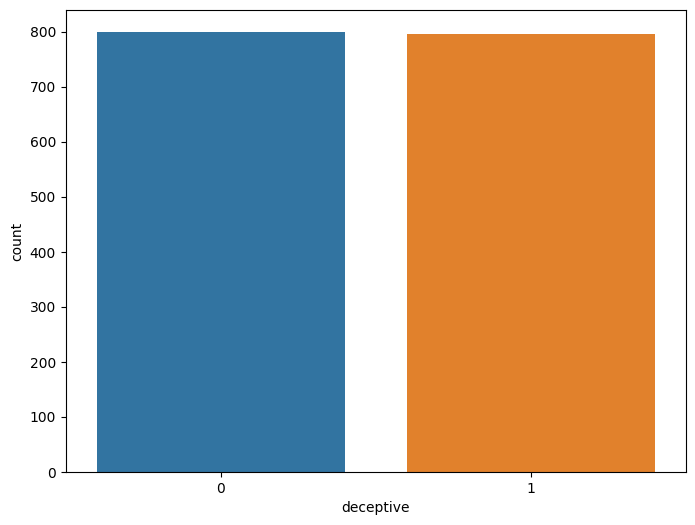

In [29]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x = 'deceptive' , data = df_target , palette= 'tab10')
plt.grid(False)
plt.show()

> **(Note 💬)** เห็นว่ามีการแบ่งสัดส่วนเท่าๆกัน

ต่อมาก็อปปี้ **column : text** มาใส่ **df_target**

In [30]:
df_target['text'] = df['text'].copy()

/tmp/ipython-input-1074843665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['text'] = df['text'].copy()


In [31]:
df_target

,deceptive,text
0,1,We stayed for a one night getaway with family ...
1,1,Triple A rate with upgrade to view room was le...
2,1,This comes a little late as I'm finally catchi...
3,1,The Omni Chicago really delivers on all fronts...
4,1,I asked for a high floor away from the elevato...
...,...,...
1595,0,Problems started when I booked the InterContin...
1596,0,The Amalfi Hotel has a beautiful website and i...
1597,0,The Intercontinental Chicago Magnificent Mile ...
1598,0,"The Palmer House Hilton, while it looks good i..."


เช็คข้อมูลว่ามี **type** แต่ละ **column** เราเป็นอะไร

In [33]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1596 non-null   int64 
 1   text       1596 non-null   string
dtypes: int64(1), string(1)
memory usage: 37.4 KB


เช็คความยาวแต่ละ column มีความยาวเท่าไหร่

> จะเห็นได้ว่าก่อนหน้าที่เราได้ทำอยู่แล้ว เราสามารถ **copy** column ชื่อว่า **Count - text **มาได้เลย 💪🏻

In [34]:
df_target['count-text'] = df['Count - text'].copy()

/tmp/ipython-input-935261403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['count-text'] = df['Count - text'].copy()


In [35]:
df_target

,deceptive,text,count-text
0,1,We stayed for a one night getaway with family ...,105
1,1,Triple A rate with upgrade to view room was le...,45
2,1,This comes a little late as I'm finally catchi...,207
3,1,The Omni Chicago really delivers on all fronts...,127
4,1,I asked for a high floor away from the elevato...,72
...,...,...,...
1595,0,Problems started when I booked the InterContin...,131
1596,0,The Amalfi Hotel has a beautiful website and i...,121
1597,0,The Intercontinental Chicago Magnificent Mile ...,141
1598,0,"The Palmer House Hilton, while it looks good i...",86


สร้างข้อมูลเชิงสุรุปทาง **สถิติ**

In [36]:
df_target['count-text'].describe()

,count-text
count,1596.000000
mean,148.718045
std,87.354383
min,25.000000
25%,88.000000
50%,127.500000
75%,182.250000
max,784.000000
